# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [6]:
# number of callbacks for white & black-sounding names
white_sounding = sum(data[data.race=='w'].call)
black_sounding = sum(data[data.race=='b'].call)
print('Black-sounding: {black_sounding}, White-sounding: {white_sounding}'.format(black_sounding=black_sounding, white_sounding=white_sounding))

Black-sounding: 157.0, White-sounding: 235.0


In [7]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [8]:
w = data[data.race=='w']
b = data[data.race=='b']

___________________________________________________________________________________________________________________
## Question 1

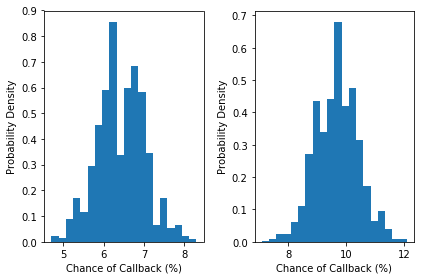

In [9]:
sample_means = []
for i in range(0, 1000):
    sample_b_df = b.sample(n=1000)
    sample_w_df = w.sample(n=1000)
    sample_b_mean = np.mean(sample_b_df.call)*100
    sample_w_mean = np.mean(sample_w_df.call)*100
    sample_means.append({'b': sample_b_mean, 'w': sample_w_mean})

sample_means_df = pd.DataFrame(sample_means)

plt.subplot(1, 2, 1)
plt.hist(sample_means_df['b'], density=True, bins=20)
plt.xlabel('Chance of Callback (%)')
plt.ylabel('Probability Density')

plt.subplot(1, 2, 2)
plt.hist(sample_means_df['w'], density=True, bins=20)
plt.xlabel('Chance of Callback (%)')
plt.ylabel('Probability Density')

# Show the plots
plt.tight_layout()
plt.show()

### Question: What test is appropriate for this problem? Does CLT apply?
    - A t-test for difference of means would be an appropriate way to investigate this problem.
    - Getting the distribution of sample means shows that the central limit theorem does apply here. The sample means are normally distributed.

**Yes, CLT does apply here.**
___________________________________________________________________________________________________________________
## Question 2

### Question: What are the null and alternate hypotheses?
**Null Hypothesis (H0):** Mean(Black Calls) - Mean(White Calls) = 0 **Alternate Hypothesis (H1):** Mean(Black Calls) - Mean(White Calls) != 0
___________________________________________________________________________________________________________________
## Question 3

In [10]:
p_value = stats.ttest_ind(b['call'], w['call'])[1]

print('P-value: {p_value}'.format(p_value = p_value))
if (p_value > 0.05):
    print('The mean chance of getting a call for black-sounding and white-sounding names is the same. Fail to reject null hypothesis')
else:
    print('The mean chance of getting a call for black-sounding and white-sounding names is not the same. Reject null hypothesis' )

P-value: 3.940802103128886e-05
The mean chance of getting a call for black-sounding and white-sounding names is not the same. Reject null hypothesis


In [29]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [30]:
def generate_bs_samples(data, func, size=1):
    """Generate bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [47]:
bs_replicates_b = generate_bs_samples(b['call'], np.mean, size=10000)
bs_replicates_w = generate_bs_samples(w['call'], np.mean, size=10000)

p_value = np.sum(bs_replicates_w <= bs_replicates_b) / len(bs_replicates)

print('P-value: {p_value}'.format(p_value=p_value))
if (p_value > 0.05):
    print('The mean chance of getting a call for candidates with black sounding and white sounding names is the same. Fail to reject null hypothesis')
else:
    print('The mean chance of getting a call for candidates with black sounding and white sounding names is not the same. Reject the null hypothesis')

P-value: 0.0
The mean chance of getting a call for candidates with black sounding and white sounding names is not the same. Reject the null hypothesis


In [16]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m*100, (m-h)*100, (m+h)*100

In [49]:
ci_b = mean_confidence_interval(b['call'])
ci_w = mean_confidence_interval(w['call'])
print('With 95% confidence:')
print('Candidates with Black-Sounding Names: Lower Limit: {lower_b}%, Mean: {mean_b}%, Upper Limit: {upper_b}%'.format(lower_b=ci_b[1], mean_b=ci_b[0], upper_b=ci_b[2]))
print('Candidates with White-Sounding Names: Lower Limit: {lower_w}%, Mean: {mean_w}%, Upper Limit: {upper_w}%'.format(lower_w=ci_w[1], mean_w=ci_w[0], upper_w=ci_w[2]))

With 95% confidence:
Candidates with Black-Sounding Names: Lower Limit: 5.471454960445062%, Mean: 6.44763857126236%, Upper Limit: 7.4238221820796575%
Candidates with White-Sounding Names: Lower Limit: 8.477242903143205%, Mean: 9.650924056768417%, Upper Limit: 10.82460521039363%


### Question: Compute margin of error, confidence interval, and p-value.
- P-Value from T-Test: p_value < 0.05: reject the null hypothesis
- P-Value from bootstrapping: p_value < 0.05: reject the null hypothesis

___________________________________________________________________________________________________________________

## Question 4 & 5

### Question: Write a story describing the statistical significance in the context or the original problem. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?
We can say with relative confidence that the chance of getting a callback is statistically higher for white-sounding names vs. black-sounding names. There are other attributes associated with the candidates like education and experience which could show other trends. This analysis does not conclude that race/name is the most important factir in callback success but it does show a statistically significant set of confidence intervals based on race/name.

****